### 【問題1】仮定関数 
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
      
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    self.loss_list : list, []
      学習用データのイテレーション毎の損失関数リスト
    self.loss_list : list, []
      検証用データのイテレーション毎の損失関数リスト
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.loss_list = []
        self.loss_val_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        
        Attributes
        ----------
        self.val : int64
          検証用データの有無を識別。　0：無  1：有
        self.Θj : 次の形のndarray, shape (n_samples, )
          学習用データのΘ
        self.Θj_val : 次の形のndarray, shape (n_samples, )
          検証用データのΘ
        """
        self.X_ = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.y_ = y
        self.val = 0
                
        self.Θj = np.random.rand(1, self.X_.shape[1])


        for iter_n in range(self.iter):
            self._linear_hypothesis()
            self._gradient_descent()
            self._cost_function()
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("ーー{}回目y~ーーーー\n{}".format(iter_n+1, self.h))
                print("ーー{}回目Θーーーー\n{}".format(iter_n+2, self.Θj))
        
        if (X_val is not None and y_val is not None):
            self.val = 1
            self.X_val_ = np.concatenate([np.ones((X_val.shape[0],1)), X_val], axis=1)
            self.y_val_ = y_val
            self.Θj_val = np.random.rand(1, self.X_val_.shape[1])

            for iter_n in range(self.iter):
                self._linear_hypothesis_val()
                self._gradient_descent_val()
                self._cost_function_val()

                if self.verbose:
                    print("ーー{}回目y~ーーーー\n{}".format(iter_n+1, self.h_val))
                    print("ーー{}回目Θーーーー\n{}".format(iter_n+2, self.Θj_val))
        
    def _linear_hypothesis(self):
        """
        線形の仮定関数を計算する    
        Attributes
        ----------
        self.h : 次の形のndarray, shape (n_samples, )
          学習用データの仮定関数の計算結果
        """
        self.h = np.dot(self.X_, self.Θj.T)
    def _linear_hypothesis_val(self):
        """
        検証データ用の_linear_hypothesis()     
        Attributes
        ----------
        self.h_val : 次の形のndarray, shape (n_samples, )
          学習用データの仮定関数の計算結果
        """
        self.h_val = np.dot(self.X_val_, self.Θj_val.T)
            
    def _cost_function(self):
        """
        線形の目的関数により、損失を算出する。(学習データ専用)
        Parameters
        ----------
        JΘ : float64
            目的関数による、損失計算のうち、サンプル数で割る前の段階の値
        """
        #print(self.h)
        #print((self.h - self.y_)**2)
        JΘ =  ((self.h - self.y_)**2).sum()
        #print(JΘ)
        self.loss = JΘ/(self.y_.shape[0]*2)  
        self.loss_list.append(self.loss)
    def _cost_function_val(self):
        """
        検証データ用の _cost_function()     
        Parameters
        ----------
        JΘ_val : float64
            目的関数による、損失計算のうち、サンプル数で割る前の段階の値
        """        
        JΘ_val = ((self.h_val - self.y_val_)**2).sum()
        self.loss_val = JΘ_val/(self.y_val_.shape[0]*2)        
        self.loss_val_list.append(self.loss_val)

    def _gradient_descent(self):
        """
        再急降下法により、次回イテレーションのΘを算出する。(学習データ専用)
        Parameters
        ----------
        Δj : 次の形のndarray, shape (n_samples, )
            現状のΘにおける勾配
        Attributes
        ----------
        self.Θj : 次の形のndarray, shape (n_samples, )
          次回イテレーションのΘ
        """
        Δj =  np.dot((self.h - self.y_).T , self.X_)
        self.Θj -= self.lr*Δj
    def _gradient_descent_val(self):
        """
        検証データ用の _gradient_descent()     
        Parameters
        ----------
        Δj_val : 次の形のndarray, shape (n_samples, )
            現状のΘにおける勾配
        Attributes
        ----------
        self.Θj_val : 次の形のndarray, shape (n_samples, )
          次回イテレーションのΘ
        """
        Δj_val =  np.dot((self.h_val - self.y_val_).T , self.X_val_)
        self.Θj_val -= self.lr*Δj_val

    def graph_cost_func(self):
        """
        損失の推移をグラフ化する。    
        検証用データが入力されていれば、学習用と検証用の損失推移を重ねてグラフ化
        """
        plt.title("Num_of_Iteration vs Loss")
        plt.xlabel("Num_of_Iteration")
        plt.ylabel("Loss")
        a=range(self.iter)
        plt.plot(range(1,self.iter+1), self.loss_list, color="b", marker="o", label="train_loss")
        if self.val is 1:
            plt.plot(range(1,self.iter+1), self.loss_val_list, color="g", marker="+", label="val_loss")
        plt.grid()
        plt.legend()
        plt.show()
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.h = np.dot(X, self.Θj.T)
        return self.h

### 【問題2】最急降下法 
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

### 【問題3】推定 
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。
仮定関数 hθ(x)の出力が推定結果です。

In [4]:
from sklearn.preprocessing import StandardScaler
scr_line_reg = ScratchLinearRegression(5, 0.1, False, True)
X = np.arange(10).reshape(5,2)
y = np.array([[9], [18], [27], [36], [45]])

std = StandardScaler()
X_std = std.fit_transform(X)

scr_line_reg.fit(X_std, y)
predict_y = scr_line_reg.predict(X_std)
print("ーー最終y~ーーーー\n",format(predict_y))
print("ーーXーーーー\n",format(X))
print("ーーyーーーー\n",format(y))

ーー1回目y~ーーーー
[[-0.67723574]
 [-0.23980733]
 [ 0.19762107]
 [ 0.63504947]
 [ 1.07247787]]
ーー2回目Θーーーー
[[13.59881053  6.56129785  6.16662421]]
ーー2回目y~ーーーー
[[-4.40118947]
 [ 4.59881053]
 [13.59881053]
 [22.59881053]
 [31.59881053]]
ーー3回目Θーーーー
[[20.29940527  6.56129785  6.16662421]]
ーー3回目y~ーーーー
[[ 2.29940527]
 [11.29940527]
 [20.29940527]
 [29.29940527]
 [38.29940527]]
ーー4回目Θーーーー
[[23.64970263  6.56129785  6.16662421]]
ーー4回目y~ーーーー
[[ 5.64970263]
 [14.64970263]
 [23.64970263]
 [32.64970263]
 [41.64970263]]
ーー5回目Θーーーー
[[25.32485132  6.56129785  6.16662421]]
ーー5回目y~ーーーー
[[ 7.32485132]
 [16.32485132]
 [25.32485132]
 [34.32485132]
 [43.32485132]]
ーー6回目Θーーーー
[[26.16242566  6.56129785  6.16662421]]
ーー最終y~ーーーー
 [[ 8.16242566]
 [17.16242566]
 [26.16242566]
 [35.16242566]
 [44.16242566]]
ーーXーーーー
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
ーーyーーーー
 [[ 9]
 [18]
 [27]
 [36]
 [45]]


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 【問題4】平均二乗誤差 
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。
平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。
平均二乗誤差は以下の数式で表されます。

In [5]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    L =  ((y_pred - y)**2).sum()    
    mse = L/y.shape[0]
    return mse

In [6]:
mse=MSE(predict_y, y)
mse

0.7015307776687332

### 【問題5】目的関数 
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
目的関数（損失関数） 
J(θ)は次の式です。

In [12]:
scr_line_reg = ScratchLinearRegression(100, 0.01, False, False)
X = np.arange(10).reshape(5,2)
y = np.array([[9], [18], [27], [36], [45]])
#y = np.arange(1100).reshape(1100,1)
std = StandardScaler()
X_std = std.fit_transform(X)

scr_line_reg.fit(X_std, y, X_std, y)
scr_line_reg._cost_function()
scr_line_reg._cost_function_val()

display(scr_line_reg.loss)
display(type(scr_line_reg.loss))
display(scr_line_reg.loss_val)

predict_y = scr_line_reg.predict(X_std)
print("ーー最終y~ーーーー\n",format(predict_y))
#print("ーーXーーーー\n",format(X))
#print("ーーyーーーー\n",format(y))
print("SK-Learn_LineReg  MY_MSE：{}".format(MSE(predict_y, y)))


C:\Users\anai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.01392017967013805

numpy.float64

0.013162229456284692

ーー最終y~ーーーー
 [[ 8.84193816]
 [17.84171346]
 [26.84148876]
 [35.84126407]
 [44.84103937]]


NameError: name 'MSE' is not defined

### 【問題6】学習と推定 
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [9]:
df = pd.read_csv("train.csv")
X = df.loc[:,["GrLivArea", "YearBuilt"]]
y = df.loc[:,["SalePrice"]]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [11]:
line_reg = LinearRegression().fit(X_train_std, y_train) 

scr_line_reg = ScratchLinearRegression(200, 0.0001, False, False)
scr_line_reg.fit(X_train_std, y_train)
predict_y = scr_line_reg.predict(X_test_std)

print("SK-Learn_LineReg  MSE：{}".format(mean_squared_error(y_test, line_reg.predict(X_test_std))))
print("Scratch_LineReg  MSE：{}".format(mean_squared_error(y_test, predict_y)))

print("SK-Learn_LineReg  MY_MSE：{}".format(MSE(line_reg.predict(X_test_std), y_test)))
print("Scratch_LineReg  MY_MSE：{}".format(MSE(y_test, predict_y)))



SK-Learn_LineReg  MSE：2689043801.56294
Scratch_LineReg  MSE：2689043801.0083838
SK-Learn_LineReg  MY_MSE：SalePrice    2.689044e+09
dtype: float64
Scratch_LineReg  MY_MSE：SalePrice    2.689044e+09
dtype: float64


### 【問題7】学習曲線のプロット 
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

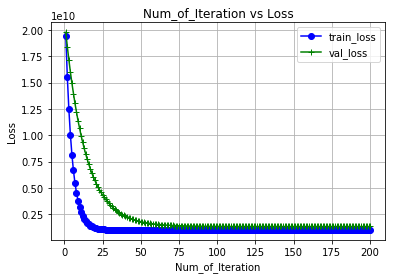

In [12]:
scr_line_reg = ScratchLinearRegression(200, 0.0001, False, False)
scr_line_reg.fit(X_train_std, y_train, X_test_std, y_test)
scr_line_reg.graph_cost_func()